In [43]:
import pandas as pd
import numpy as np
from scipy.stats import mode
from numpy import dot
from numpy.linalg import norm

In [44]:
def KNN (train_file,test_file,k,criterian=None):
  df = pd.read_csv(f"{train_file}")
  X = df.drop("LABEL", axis=1).values
  y = df["LABEL"].values
  df_test = pd.read_csv(f"{test_file}")
  new_data_point = df_test.drop("LABEL", axis=1).values
  y_true = df_test["LABEL"].values
  if criterian == "Euclidean Distance":
    neighbors_e = np.argsort(np.array([np.linalg.norm((new_data_point[i] - X), axis=1) for i in range(new_data_point.shape[0])]), axis=1)[:,:k]
    y_predict_e = np.array([mode(y[neighbors_e][i]) for i in range(neighbors_e.shape[0])]).reshape(2100,2)[:,0]
    return y_predict_e
  if criterian == "Cosine Distance":
    X_final = X / norm(X,axis=1).reshape((210,1))
    new_data_point_final = new_data_point / norm(new_data_point,axis=1).reshape((2100,1))
    neighbors_c = np.argsort(np.array([np.dot(X_final,new_data_point_final[i])*-1 for i in range(new_data_point.shape[0])]), axis=1)[:,:k]
    y_predict_c = np.array([mode(y[neighbors_c][i]) for i in range(neighbors_c.shape[0])]).reshape(2100,2)[:,0]
    return y_predict_c


In [45]:
from sklearn import metrics
import matplotlib.pyplot as plt

df_test = pd.read_csv("segmentation.test.csv")
y_true = df_test["LABEL"].values
acc_e =[]
acc_c =[]
for i in range(1,9):
  y_p_e =KNN("segmentation.Train.csv","segmentation.test.csv",i,"Euclidean Distance")
  y_p_c =KNN("segmentation.Train.csv","segmentation.test.csv",i,"Cosine Distance")  
  acc_e.append(metrics.accuracy_score(y_true, y_p_e)*100)
  acc_c.append(metrics.accuracy_score(y_true, y_p_c)*100)



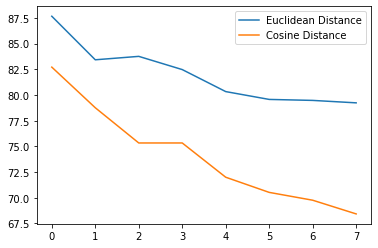

In [46]:
plt.plot(range(8),acc_e , label = "Euclidean Distance")
plt.plot(range(8),acc_c, label = "Cosine Distance")
plt.legend()